# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'>랭킹정보 가져오기 </font>

In [1]:
from images import bigpycraft_bda as bpc
from IPython.display import Image 

## NAVER 영화 랭킹
> URL ::  https://movie.naver.com/movie/sdb/rank/rmovie.naver
> - 영화랭킹 TOP10 정보 크롤링
> - 데이터수집 : 순위, 영화명, 변동폭, 평점(관람객/평론가/네티즌), 장르, 감독, 출연, 등급

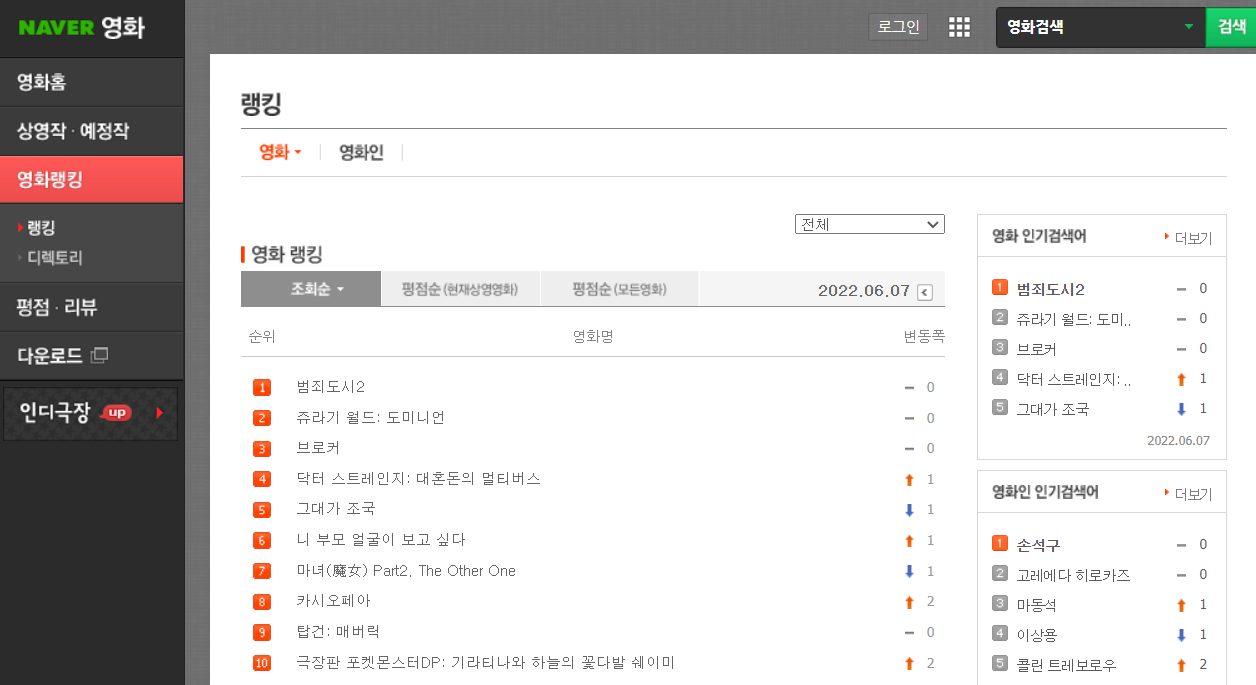

In [2]:
Image(bpc.MV_TOP10_LIST)

### <font color='blue'>1단계 : 리스트 크롤링 </font>
> **데이터수집 : 순위, 영화명, 변동폭**, ~평점(관람객/평론가/네티즌), 장르, 감독, 출연, 등급~

In [3]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [4]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")
soup.title

<title>랭킹 : 네이버 영화</title>

In [5]:
table_tag = soup.find('table', 'list_ranking')
# table_tag

In [6]:
tbody_tag = table_tag.find('tbody')
type(tbody_tag)

bs4.element.Tag

In [7]:
tr_tags = tbody_tag.find_all('tr')
len(tr_tags)

56

In [8]:
tr_tags[0]   # Blank

<tr><td class="blank01" colspan="8"></td></tr>

In [9]:
tr_tags[1]   # 1위

<tr>
<td class="ac"><img alt="01" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r01.gif" width="14"/></td>
<td class="title">
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=192608" title="범죄도시2">범죄도시2</a>
</div>
</td>
<!-- 평점순일 때 평점 추가하기  -->
<!----------------------------------------->
<td class="ac"><img alt="na" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_na_1.gif" width="7"/></td>
<td class="range ac">0</td>
</tr>

In [10]:
tr_tags[10]   # 10위

<tr>
<td class="ac"><img alt="010" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r10.gif" width="14"/></td>
<td class="title">
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=50368" title="극장판 포켓몬스터DP: 기라티나와 하늘의 꽃다발 쉐이미">극장판 포켓몬스터DP: 기라티나와 하늘의 꽃다발 쉐이미</a>
</div>
</td>
<!-- 평점순일 때 평점 추가하기  -->
<!----------------------------------------->
<td class="ac"><img alt="na" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_na_1.gif" width="7"/></td>
<td class="range ac">0</td>
</tr>

In [11]:
idx = 1       # 1~10
tr_tag = tr_tags[idx]

In [12]:
td_tags = tr_tag.find_all('td')
len(td_tags)

4

In [13]:
td_tags[0]

<td class="ac"><img alt="01" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r01.gif" width="14"/></td>

In [14]:
td_tags[1]

<td class="title">
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=192608" title="범죄도시2">범죄도시2</a>
</div>
</td>

In [15]:
td_tags[2]

<td class="ac"><img alt="na" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_na_1.gif" width="7"/></td>

In [16]:
td_tags[3]

<td class="range ac">0</td>

#### <font color='#00AAFF'>순위 : 이미지의 풍선도움말 (alt)</font>

In [17]:
ranking = td_tags[0].find('img')
ranking = ranking['alt']
ranking

'01'

In [18]:
ranking = int(ranking)
ranking

1

#### <font color='#00AAFF'>영화명</font>

In [19]:
movie = td_tags[1].find('a')
movie

<a href="/movie/bi/mi/basic.naver?code=192608" title="범죄도시2">범죄도시2</a>

In [20]:
title = movie.get_text().strip()
title

'범죄도시2'

#### <font color='#00AAFF'>링크</font>

In [21]:
root_url = 'https://movie.naver.com' if movie['href'].startswith('/') else ''
root_url

'https://movie.naver.com'

In [22]:
link = root_url + movie['href']
link = link.strip()
link

'https://movie.naver.com/movie/bi/mi/basic.naver?code=192608'

#### <font color='#00AAFF'>변동폭 : 부호 + 변동값</font>
>  
> - 화살표 DOWN : 마이너스
> - 화살표 UP : 플러스
> <br/><font color='#0000EE'>cf. 마이너스인 경우를 제외하고 부호 생략</font> 

In [23]:
range_sign = td_tags[2].find('img')
range_sign = range_sign['alt']
range_sign = '-' if range_sign=='down' else ''
range_sign

''

In [24]:
range_num = td_tags[3].get_text()
range_num = range_num.strip()
range_num

'0'

In [25]:
range_ac = range_sign + range_num
range_ac

'0'

In [26]:
def crawl_movie_list_top10():
    
    Ranking   = []
    Title     = []
    Link      = []
    Range_ac  = []

    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
    html = urlopen(url)
    soup = BeautifulSoup(html, "lxml")

    table_tag = soup.find('table', 'list_ranking')
    tbody_tag = table_tag.find('tbody')
    tr_tags = tbody_tag.find_all('tr')

    for tr_tag in tr_tags[1:11]:
        
        td_tags = tr_tag.find_all('td')

        # 순위
        ranking = td_tags[0].find('img')
        ranking = ranking['alt']   
        ranking = int(ranking)

        # 영화명
        movie = td_tags[1].find('a')
        title = movie.get_text().strip()

        # link
        root_url = 'https://movie.naver.com' if movie['href'].startswith('/') else ''
        link = root_url + movie['href']
        link = link.strip()
        
        # range_ac
        range_sign = td_tags[2].find('img')
        range_sign = range_sign['alt']
        range_sign = '-' if range_sign=='down' else ''
        range_num = td_tags[3].get_text()
        range_num = range_num.strip()
        range_ac = range_sign + range_num
    
        Ranking.append(ranking)
        Title.append(title)
        Link.append(link)
        Range_ac.append(range_ac)

    data   = {'순위':Ranking, '영화명':Title, '변동폭':Range_ac, '링크':Link }
    ret_df = pd.DataFrame(data)
    
    return ret_df    

In [27]:
top10_df = crawl_movie_list_top10()
top10_df

,순위,영화명,변동폭,링크
0,1,범죄도시2,0,https://movie.naver.com/movie/bi/mi/basic.nave...
1,2,쥬라기 월드: 도미니언,0,https://movie.naver.com/movie/bi/mi/basic.nave...
2,3,브로커,0,https://movie.naver.com/movie/bi/mi/basic.nave...
3,4,닥터 스트레인지: 대혼돈의 멀티버스,0,https://movie.naver.com/movie/bi/mi/basic.nave...
4,5,니 부모 얼굴이 보고 싶다,1,https://movie.naver.com/movie/bi/mi/basic.nave...
5,6,그대가 조국,-1,https://movie.naver.com/movie/bi/mi/basic.nave...
6,7,마녀(魔女) Part2. The Other One,0,https://movie.naver.com/movie/bi/mi/basic.nave...
7,8,카시오페아,0,https://movie.naver.com/movie/bi/mi/basic.nave...
8,9,탑건: 매버릭,0,https://movie.naver.com/movie/bi/mi/basic.nave...
9,10,극장판 포켓몬스터DP: 기라티나와 하늘의 꽃다발 쉐이미,0,https://movie.naver.com/movie/bi/mi/basic.nave...


In [28]:
top10_df.set_index('순위', inplace=True)
top10_df

,영화명,변동폭,링크
순위,,,
1,범죄도시2,0,https://movie.naver.com/movie/bi/mi/basic.nave...
2,쥬라기 월드: 도미니언,0,https://movie.naver.com/movie/bi/mi/basic.nave...
3,브로커,0,https://movie.naver.com/movie/bi/mi/basic.nave...
4,닥터 스트레인지: 대혼돈의 멀티버스,0,https://movie.naver.com/movie/bi/mi/basic.nave...
5,니 부모 얼굴이 보고 싶다,1,https://movie.naver.com/movie/bi/mi/basic.nave...
6,그대가 조국,-1,https://movie.naver.com/movie/bi/mi/basic.nave...
7,마녀(魔女) Part2. The Other One,0,https://movie.naver.com/movie/bi/mi/basic.nave...
8,카시오페아,0,https://movie.naver.com/movie/bi/mi/basic.nave...
9,탑건: 매버릭,0,https://movie.naver.com/movie/bi/mi/basic.nave...


In [29]:
top10_df.loc[1]

영화명                                                범죄도시2
변동폭                                                    0
링크     https://movie.naver.com/movie/bi/mi/basic.nave...
Name: 1, dtype: object

In [30]:
top10_df.to_csv('data/movie_top10.csv', sep=',', encoding='UTF-8')

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>